# Dynamics Homework 3

Liam Dubay

February 17, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 2

In [83]:
# Two-body equations
def ellipse_polar(a, e, omega=0):
    p = a*(1-e**2)
    r = lambda theta: p / (1 + e*np.cos(theta - omega))
    return r

def true_anomaly(a, e):
    M = lambda t: 2*np.pi * a**(-3/2) * t # mean anomaly
    # approximation for small e
    nu = lambda M: M + 2*e*np.sin(M) + 1.25*e**2*np.sin(2*M)
    return lambda t: nu(M(t))

In [166]:
a_Jup = 5.2 # AU
m_Jup = 1/1047 # Msun
e_ast = 0.3
a_ast = a_Jup * (1/3)**(2/3)

In [167]:
r_Jup = ellipse_polar(a_Jup, 0)
theta_Jup = true_anomaly(a_Jup, 0)

r_ast = ellipse_polar(a_ast, e_ast)
theta_ast = true_anomaly(a_ast, e_ast)

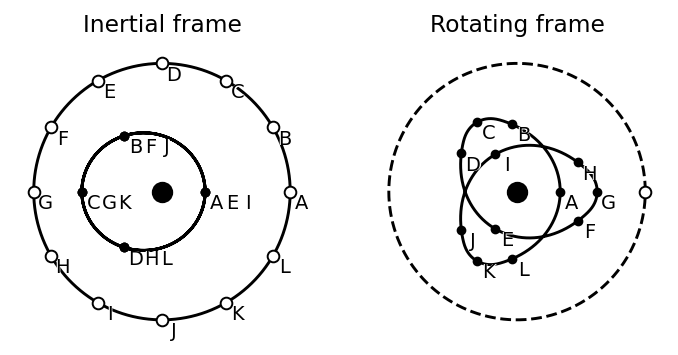

In [168]:
fig, axs = plt.subplots(1, 2, dpi=140, subplot_kw={'projection': 'polar'})

tfine = np.linspace(0, a_Jup**(3/2), 1200, endpoint=False)
t = tfine[::100]
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Inertial frame
ax = axs[0]
# Plot Jupiter (could have just done a simple circle, oh well)
ax.plot(theta_Jup(tfine), r_Jup(theta_Jup(tfine)), color='k')
ax.scatter(theta_Jup(t), r_Jup(theta_Jup(t)), marker='o', facecolors='w', edgecolors='k', zorder=10)
# Plot 3:1 resonance asteroid
ax.plot(theta_ast(tfine), r_ast(theta_ast(tfine)), color='k')
ax.scatter(theta_ast(t), r_ast(theta_ast(t)), marker='o', color='k', s=16)
# Plot Sun
ax.scatter(0, 0, marker='o', s=100, color='k')
# Label points
xoffset = 0
theta0 = 0
for time, label in zip(t, alphabet):
    # Outline text with white border for visual clarity
    ax.annotate(label, (theta_Jup(time), r_Jup(theta_Jup(time))),
                textcoords='offset points', xytext=(6, -6), va='center', ha='center',
                fontweight='extra bold', color='w')
    ax.annotate(label, (theta_Jup(time), r_Jup(theta_Jup(time))),
                textcoords='offset points', xytext=(6, -6), va='center', ha='center')
    # Offset labels once each orbit to avoid overlapping text
    if theta_ast(time) - 2*np.pi >= theta0:
        xoffset += 8
        theta0 = theta_ast(time)
    ax.annotate(label, (theta_ast(time), r_ast(theta_ast(time))),
                textcoords='offset points', xytext=(6+xoffset, -6), va='center', ha='center',
                fontweight='extra bold', color='w')
    ax.annotate(label, (theta_ast(time), r_ast(theta_ast(time))),
                textcoords='offset points', xytext=(6+xoffset, -6), va='center', ha='center')
ax.grid(None)
ax.set_xticks([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.set_rmax(6)
ax.set_title('Inertial frame')

# Rotating frame
ax = axs[1]
# Plot Jupiter (could have just done a simple circle, oh well)
ax.plot(theta_Jup(tfine), r_Jup(theta_Jup(tfine)), color='k', linestyle='--')
ax.scatter(theta_Jup(0), r_Jup(theta_Jup(0)), marker='o', facecolors='w', edgecolors='k', zorder=10)
# Plot 3:1 resonance asteroid
ax.plot(theta_ast(tfine) - theta_Jup(tfine), r_ast(theta_ast(tfine)), color='k')
ax.scatter(theta_ast(t) - theta_Jup(t), r_ast(theta_ast(t)), marker='o', color='k', s=16)
# Plot Sun
ax.scatter(0, 0, marker='o', s=100, color='k')
# Label points
xoffset = 0
theta0 = 0
for time, label in zip(t, alphabet):
    # Outline text with white border for visual clarity
    ax.annotate(label, (theta_ast(time) - theta_Jup(time), r_ast(theta_ast(time))),
                textcoords='offset points', xytext=(6, -6), va='center', ha='center',
                fontweight='extra bold', color='w')
    ax.annotate(label, (theta_ast(time) - theta_Jup(time), r_ast(theta_ast(time))),
                textcoords='offset points', xytext=(6, -6), va='center', ha='center')
ax.grid(None)
ax.set_xticks([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
ax.set_rmax(6)
ax.set_title('Rotating frame')
plt.show()